In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import os
print(os.path.abspath('.'))

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from lifelines.utils import concordance_index
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, roc_auc_score, average_precision_score, f1_score

In [3]:
from DeepPurpose import oneliner
from DeepPurpose.dataset import *
from DeepPurpose import utils, models, dataset

In [4]:
model2 = models.model_pretrained(path_dir = './model_CNN_AAC_DB_CLA/')
model2

In [5]:
model2.config

{'input_dim_drug': 1024,
 'input_dim_protein': 8420,
 'hidden_dim_drug': 128,
 'hidden_dim_protein': 256,
 'cls_hidden_dims': [1024, 1024, 512],
 'batch_size': 512,
 'train_epoch': 50,
 'test_every_X_epoch': 10,
 'LR': 0.001,
 'drug_encoding': 'CNN',
 'target_encoding': 'AAC',
 'result_folder': './result/',
 'binary': True,
 'num_workers': 10,
 'cnn_drug_filters': [32, 64, 96],
 'cnn_drug_kernels': [4, 6, 8],
 'mlp_hidden_dims_target': [1024, 256, 64],
 'decay': 0}

In [6]:
Smile = np.load("DB_smiles_binary.npy", allow_pickle=True)
Target = np.load("DB_targets_binary.npy", allow_pickle=True)
y = np.load("DB_y_binary.npy", allow_pickle=True)
print('Done!')

Done!


In [7]:
drug = pd.DataFrame(Smile,columns=['drug'])
drug.head(1)

,drug
0,Cc1ccc(CNS(=O)(=O)c2ccc(s2)S(N)(=O)=O)cc1


In [8]:
drug2 = drug['drug'].unique()

In [9]:
drug2 = pd.DataFrame(drug2,columns=['drug'])
drug2.head(1)

,drug
0,Cc1ccc(CNS(=O)(=O)c2ccc(s2)S(N)(=O)=O)cc1


In [ ]:
#-----performance of the model on all data(test subset)

In [10]:
X_drug = Smile.tolist()
X_target = Target.tolist() 
y = y.tolist()

drug_encoding, target_encoding = 'CNN', 'AAC'
X = utils.data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='no_split')


Drug Target Interaction Prediction Mode...
in total: 66444 drug-target pairs
encoding drug...
unique drugs: 10665
encoding protein...
unique target sequence: 1413
-- Encoding AAC takes time. Time Reference: 24s for ~100 sequences in a CPU.				 Calculate your time by the unique target sequence #, instead of the entire dataset.
splitting dataset...
do not do train/test split on the data for already splitted data


In [11]:
y_pred = model2.predict(X) 
y_label = y
#print(sum_uncer)

predicting...


In [12]:
y_pred_ = pd.DataFrame(y_pred, columns=['y_pred'])
y_pred_.to_csv('y_pred_CNN_AAC_DB_CLA.csv')

In [13]:
AUROC = roc_auc_score(y_label, y_pred)
AUPRC = average_precision_score(y_label, y_pred)
#F1 = f1_score(y_label, outputs)

print(AUROC)
print(AUPRC)
#print(F1)

0.9934608590034895
0.9495647541900948


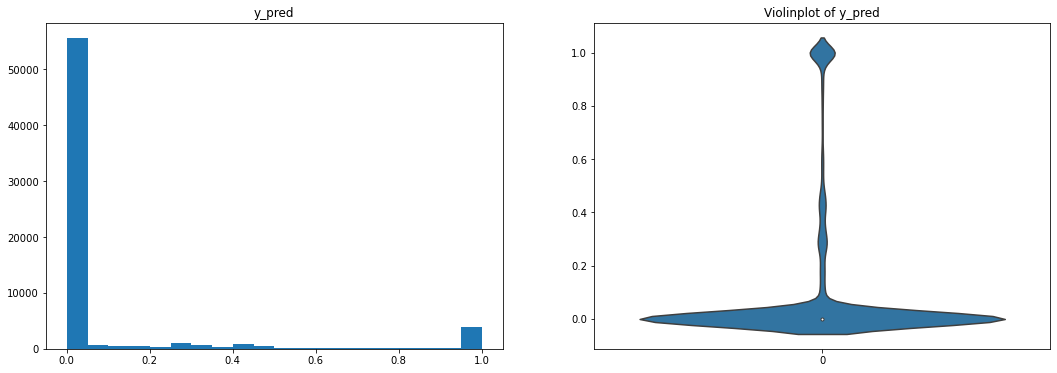

In [14]:
fig, ax = plt.subplots(figsize = (18, 6))
plt.subplot(1, 2, 1);
plt.hist(y_pred, bins=20);
plt.title('y_pred');
plt.subplot(1, 2, 2);
sns.violinplot(data=y_pred);
plt.title('Violinplot of y_pred');

In [15]:
#-----screen potential drugs for Tie2

In [15]:
X_drug = drug2['drug'].values.tolist()
X_target = ['MDSLASLVLCGVSLLLSGTVEGAMDLILINSLPLVSDAETSLTCIASGWRPHEPITIGRDFEALMNQHQDPLEVTQDVTREWAKKVVWKREKASKINGAYFCEGRVRGEAIRIRTMKMRQQASFLPATLTMTVDKGDNVNISFKKVLIKEEDAVIYKNGSFIHSVPRHEVPDILEVHLPHAQPQDAGVYSARYIGGNLFTSAFTRLIVRRCEAQKWGPECNHLCTACMNNGVCHEDTGECICPPGFMGRTCEKACELHTFGRTCKERCSGQEGCKSYVFCLPDPYGCSCATGWKGLQCNEACHPGFYGPDCKLRCSCNNGEMCDRFQGCLCSPGWQGLQCEREGIQRMTPKIVDLPDHIEVNSGKFNPICKASGWPLPTNEEMTLVKPDGTVLHPKDFNHTDHFSVAIFTIHRILPPDSGVWVCSVNTVAGMVEKPFNISVKVLPKPLNAPNVIDTGHNFAVINISSEPYFGDGPIKSKKLLYKPVNHYEAWQHIQVTNEIVTLNYLEPRTEYELCVQLVRRGEGGEGHPGPVRRFTTASIGLPPPRGLNLLPKSQTTLNLTWQPIFPSSEDDFYVEVERRSVQKSDQQNIKVPGNLTSVLLNNLHPREQYVVRARVNTKAQGEWSEDLTAWTLSDILPPQPENIKISNITHSSAVISWTILDGYSISSITIRYKVQGKNEDQHVDVKIKNATITQYQLKGLEPETAYQVDIFAENNIGSSNPAFSHELVTLPESQAPADLGGGKMLLIAILGSAGMTCLTVLLAFLIILQLKRANVQRRMAQAFQNVREEPAVQFNSGTLALNRKVKNNPDPTIYPVLDWNDIKFQDVIGEGNFGQVLKARIKKDGLRMDAAIKRMKEYASKDDHRDFAGELEVLCKLGHHPNIINLLGACEHRGYLYLAIEYAPHGNLLDFLRKSRVLETDPAFAIANSTASTLSSQQLLHFAADVARGMDYLSQKQFIHRDLAARNILVGENYVAKIADFGLSRGQEVYVKKTMGRLPVRWMAIESLNYSVYTTNSDVWSYGVLLWEIVSLGGTPYCGMTCAELYEKLPQGYRLEKPLNCDDEVYDLMRQCWREKPYERPSFAQILVSLNRMLEERKTYVNTTLYEKFTYAGIDCSAEEAA']
y = np.ones(len(drug2)).tolist()

drug_encoding, target_encoding = 'CNN', 'AAC'
X = utils.data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='no_split')


Drug Target Interaction Prediction Mode...
in total: 10665 drug-target pairs
encoding drug...
unique drugs: 10665
encoding protein...
unique target sequence: 1
-- Encoding AAC takes time. Time Reference: 24s for ~100 sequences in a CPU.				 Calculate your time by the unique target sequence #, instead of the entire dataset.
splitting dataset...
do not do train/test split on the data for already splitted data


In [16]:
y_pred = model2.predict(X) 
#y_pred, sum_uncer = model2.predict(X) 
y_label = y
#print(sum_uncer)

predicting...


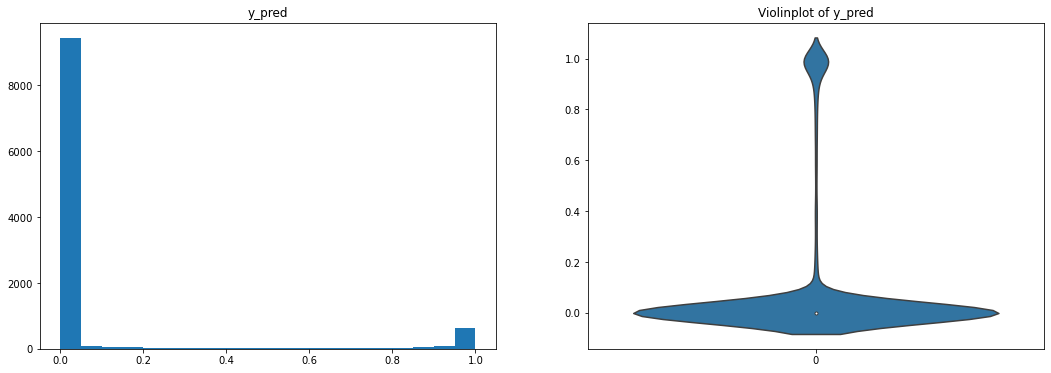

In [17]:
fig, ax = plt.subplots(figsize = (18, 6))
plt.subplot(1, 2, 1);
plt.hist(y_pred, bins=20);
plt.title('y_pred');
plt.subplot(1, 2, 2);
sns.violinplot(data=y_pred);
plt.title('Violinplot of y_pred');

In [18]:
a=drug2
a

,drug
0,Cc1ccc(CNS(=O)(=O)c2ccc(s2)S(N)(=O)=O)cc1
1,COc1ccc(CNS(=O)(=O)c2ccc(s2)S(N)(=O)=O)cc1
2,NS(=O)(=O)c1ccc(s1)S(=O)(=O)NCc1cccs1
3,NS(=O)(=O)c1cc2C(O)CN(Cc3cccs3)S(=O)(=O)c2s1
4,COc1ccc(cc1)N1CC(O)c2cc(sc2S1(=O)=O)S(N)(=O)=O
...,...
10660,O=C(NCCCCS(=O)(=O)c1ccccc1)c1ccc2nccn2c1
10661,CCOc1cc(ccc1C1=N[C@@](C)(c2ccc(Cl)cc2)[C@](C)(...
10662,COc1cc(ccc1NC(=O)[C@@H]1N[C@@H](CC(C)(C)C)[C@@...
10663,CC(C)(C)C[C@@H]1N[C@H]([C@H](c2cccc(Cl)c2F)[C@...


In [19]:
b=pd.DataFrame(y_pred,columns=['y_pred'])
b

,y_pred
0,1.241700e-13
1,8.627900e-14
2,1.155525e-21
3,1.369736e-20
4,5.413740e-04
...,...
10660,2.449619e-20
10661,9.553700e-01
10662,9.920204e-01
10663,6.968113e-01


In [20]:
c=pd.concat([a,b],axis=1)
c

,drug,y_pred
0,Cc1ccc(CNS(=O)(=O)c2ccc(s2)S(N)(=O)=O)cc1,1.241700e-13
1,COc1ccc(CNS(=O)(=O)c2ccc(s2)S(N)(=O)=O)cc1,8.627900e-14
2,NS(=O)(=O)c1ccc(s1)S(=O)(=O)NCc1cccs1,1.155525e-21
3,NS(=O)(=O)c1cc2C(O)CN(Cc3cccs3)S(=O)(=O)c2s1,1.369736e-20
4,COc1ccc(cc1)N1CC(O)c2cc(sc2S1(=O)=O)S(N)(=O)=O,5.413740e-04
...,...,...
10660,O=C(NCCCCS(=O)(=O)c1ccccc1)c1ccc2nccn2c1,2.449619e-20
10661,CCOc1cc(ccc1C1=N[C@@](C)(c2ccc(Cl)cc2)[C@](C)(...,9.553700e-01
10662,COc1cc(ccc1NC(=O)[C@@H]1N[C@@H](CC(C)(C)C)[C@@...,9.920204e-01
10663,CC(C)(C)C[C@@H]1N[C@H]([C@H](c2cccc(Cl)c2F)[C@...,6.968113e-01


In [21]:
c.to_csv('y_pred_TIE2_CNN_AAC_DB_CLA.csv')

In [23]:
d=c.sort_values(axis=0, ascending=False, by='y_pred')
d.head()

,drug,y_pred
709,CS(=O)(=O)N1CCN(CC1)c1ccc(Nc2ncc(C(N)=O)c(NC3C...,1.0
9165,CN(C)CCC[C@H](N)CC(=O)N1CCN(CC1)C(=O)C1(CCCC1)...,1.0
9159,CN1CCC(CC1)(NS(=O)(=O)c1ccc(Cl)c(COc2cccc3c(C)...,1.0
9145,CC(=O)N1CCC(CC1)(NS(=O)(=O)c1ccc(Cl)c(COc2cccc...,1.0
3424,CC1(C)C2=C3C=C4C(CC[N+]5=C4C(C)(C)c4cc(CC(=O)N...,1.0


In [24]:
d.to_csv('y_pred_TIE2_CNN_AAC_DB_CLA_SORTED.csv')